 # Project 7: Explanatory Data Analysis & Advanced Visualization (Baby Names Dataset)

## First Inspection: The most popular Names in 2018 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv("us_baby_names.csv")

In [3]:
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype   
---  ------  -----   
 0   Year    int64   
 1   Name    object  
 2   Gender  category
 3   Count   int64   
dtypes: category(1), int64(2), object(1)
memory usage: 46.7+ MB


In [5]:
df.nunique()

Year        139
Name      98400
Gender        2
Count     13720
dtype: int64

In [6]:
df.Gender = df.Gender.astype("category")

In [8]:
names_2018 = df[df.Year == 2018].copy()
names_2018

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [9]:
names_2018[names_2018.Gender == "F"].nlargest(10, "Count")

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [11]:
def most_pop(year, gender, n):
    return df[(df.Year == year) & (df.Gender == gender)].nlargest(n, "Count")

In [12]:
most_pop(2018, "F", 10)

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [13]:
most_pop(2018, "M", 10)

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389
1943047,2018,Benjamin,M,13381
1943048,2018,Elijah,M,12886
1943049,2018,Lucas,M,12585
1943050,2018,Mason,M,12435
1943051,2018,Logan,M,12352


## Evergreen Names (1880 - 2018)

In [14]:
f_2018 = most_pop(2018, "F", 20)
f_2018

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [15]:
f_1880 = most_pop(1880, "F", 20)
f_1880

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
5,1880,Margaret,F,1578
6,1880,Ida,F,1472
7,1880,Alice,F,1414
8,1880,Bertha,F,1320
9,1880,Sarah,F,1288


In [16]:
# get both names that are in both dataframes - do inner merge on the name column
f_2018[["Name", "Count"]].merge(f_1880[["Name", "Count"]], how = "inner", on = "Name")

,Name,Count_x,Count_y
0,Emma,18688,2003
1,Elizabeth,8513,1939
2,Ella,8055,1156


In [17]:
# pass tuple with the suffixes
f_evergreen = f_2018[["Name", "Count"]].merge(f_1880[["Name", "Count"]], how = "inner", on = "Name", 
                           suffixes=("_2018", "_1880"))
f_evergreen

,Name,Count_2018,Count_1880
0,Emma,18688,2003
1,Elizabeth,8513,1939
2,Ella,8055,1156


In [18]:
m_2018 = most_pop(2018, "M", 20)
m_2018

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389
1943047,2018,Benjamin,M,13381
1943048,2018,Elijah,M,12886
1943049,2018,Lucas,M,12585
1943050,2018,Mason,M,12435
1943051,2018,Logan,M,12352


In [19]:
m_1880 = most_pop(1880, "M", 20)
m_1880

,Year,Name,Gender,Count
942,1880,John,M,9655
943,1880,William,M,9532
944,1880,James,M,5927
945,1880,Charles,M,5348
946,1880,George,M,5126
947,1880,Frank,M,3242
948,1880,Joseph,M,2632
949,1880,Thomas,M,2534
950,1880,Henry,M,2444
951,1880,Robert,M,2415


In [20]:
m_evergreen = m_2018[["Name", "Count"]].merge(m_1880[["Name", "Count"]], how = "inner", on = "Name", 
                                              suffixes=("_2018", "_1880"))
m_evergreen

,Name,Count_2018,Count_1880
0,William,14516,9532
1,James,13525,5927
2,Henry,10649,2444


In [ ]:
# pretty interesting being able to answer that question

## Advanced Data Aggregation

In [21]:
df = pd.read_csv("us_baby_names.csv")

In [22]:
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [23]:
df.groupby(["Name", "Gender"]).Count.sum().reset_index(level = -1)

,Gender,Count
Name,,
Aaban,M,114
Aabha,F,35
Aabid,M,16
Aabidah,F,5
Aabir,M,10
...,...,...
Zyvion,M,5
Zyvon,M,7
Zyyanna,F,6


In [24]:
# ahh yess, aggregations - grouped by name and gender
agg = df.groupby(["Name", "Gender"]).agg(Total = ("Count", "sum"), No_Year = ("Count", "count"), 
                                         First_Year = ("Year", "min"), Last_Year = ("Year", "max"),
                                         Max_Count = ("Count", "max"))

In [25]:
agg

,,Total,No_Year,First_Year,Last_Year,Max_Count
Name,Gender,,,,,
Aaban,M,114,11,2007,2018,16
Aabha,F,35,5,2011,2016,9
Aabid,M,16,3,2003,2018,6
Aabidah,F,5,1,2018,2018,5
Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5
Zyvon,M,7,1,2015,2015,7
Zyyanna,F,6,1,2010,2010,6


In [26]:
def best_year(group):
    return group.nlargest(1, "Count").Year

In [27]:
best_y = df.groupby(["Name", "Gender"]).apply(best_year)

In [28]:
best_y

Name     Gender         
Aaban    M       1817711    2014
Aabha    F       1803981    2014
Aabid    M       1953741    2018
Aabidah  F       1940601    2018
Aabir    M       1890403    2016
                            ... 
Zyvion   M       1658038    2009
Zyvon    M       1856007    2015
Zyyanna  F       1675008    2010
Zyyon    M       1824324    2014
Zzyzx    M       1692111    2010
Name: Year, Length: 109173, dtype: int64

In [29]:
best_y.droplevel(-1)

Name     Gender
Aaban    M         2014
Aabha    F         2014
Aabid    M         2018
Aabidah  F         2018
Aabir    M         2016
                   ... 
Zyvion   M         2009
Zyvon    M         2015
Zyyanna  F         2010
Zyyon    M         2014
Zzyzx    M         2010
Name: Year, Length: 109173, dtype: int64

In [30]:
agg["Best_Year"] = best_y.droplevel(-1)

In [31]:
agg

,,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
Name,Gender,,,,,,
Aaban,M,114,11,2007,2018,16,2014
Aabha,F,35,5,2011,2016,9,2014
Aabid,M,16,3,2003,2018,6,2018
Aabidah,F,5,1,2018,2018,5,2018
Aabir,M,10,2,2016,2018,5,2016
...,...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5,2009
Zyvon,M,7,1,2015,2015,7,2015
Zyyanna,F,6,1,2010,2010,6,2010


In [32]:
agg.reset_index(inplace = True)

In [33]:
agg

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
0,Aaban,M,114,11,2007,2018,16,2014
1,Aabha,F,35,5,2011,2016,9,2014
2,Aabid,M,16,3,2003,2018,6,2018
3,Aabidah,F,5,1,2018,2018,5,2018
4,Aabir,M,10,2,2016,2018,5,2016
...,...,...,...,...,...,...,...,...
109168,Zyvion,M,5,1,2009,2009,5,2009
109169,Zyvon,M,7,1,2015,2015,7,2015
109170,Zyyanna,F,6,1,2010,2010,6,2010
109171,Zyyon,M,6,1,2014,2014,6,2014


In [34]:
agg[(agg.Name == "Mary") & (agg.Gender == "M")]

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
68680,Mary,M,15165,131,1880,2014,340,1930


## Most Popular Names of all Times

In [35]:
agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total"))

Name Gender    Total  No_Year  First_Year  Last_Year  \
Gender                                                                     
F      68679        Mary      F  4125675      139        1880       2018   
       30706   Elizabeth      F  1638349      139        1880       2018   
       79184    Patricia      F  1572016      135        1884       2018   
       46567    Jennifer      F  1467207      101        1916       2018   
       62973       Linda      F  1452668      139        1880       2018   
       11699     Barbara      F  1434397      139        1880       2018   
       67371    Margaret      F  1248985      139        1880       2018   
       94540       Susan      F  1121703      139        1880       2018   
       28575     Dorothy      F  1107635      139        1880       2018   
       87546       Sarah      F  1077746      139        1880       2018   
M      43582       James      M  5164280      139        1880       2018   
       48388        John      M  5124817      139        1880       2018   
       84427      Robert      M  4820129      139        1880       2018   
       71023     Michael      M  4362731      139        1880       2018   
       104615    William      M  4117369      139        1880       2018   
       24204       David      M  3621322      139        1880       2018   
       49192      Joseph      M  2613304      139        1880       2018   
       83864     Richard      M  2565301      139        1880       2018   
       18299     Charles      M  2392779      139        1880       2018   
       98544      Thomas      M  2311849      139        1880       2018   

               Max_Count  Best_Year  
Gender                               
F      68679       73985       1921  
       30706       20744       1990  
       79184       56442       1951  
       46567       63603       1972  
       62973       99689       1947  
       11699       48792       1947  
       67371       28467       1921  
       94540       47402       1955  
       28575       39999       1924  
       87546       28484       1982  
M      43582       94757       1947  
       48388       88319       1947  
       84427       91640       1947  
       71023       92704       1957  
       104615      66989       1947  
       24204       86253       1955  
       49192       32732       1956  
       83864       58868       1946  
       18299       40770       1947  
       98544       48652       1952

In [36]:
# get rid of multi-index, create a range index
all_times = agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total")).reset_index(drop = True)
all_times

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
0,Mary,F,4125675,139,1880,2018,73985,1921
1,Elizabeth,F,1638349,139,1880,2018,20744,1990
2,Patricia,F,1572016,135,1884,2018,56442,1951
3,Jennifer,F,1467207,101,1916,2018,63603,1972
4,Linda,F,1452668,139,1880,2018,99689,1947
5,Barbara,F,1434397,139,1880,2018,48792,1947
6,Margaret,F,1248985,139,1880,2018,28467,1921
7,Susan,F,1121703,139,1880,2018,47402,1955
8,Dorothy,F,1107635,139,1880,2018,39999,1924
9,Sarah,F,1077746,139,1880,2018,28484,1982


In [37]:
import seaborn as sns

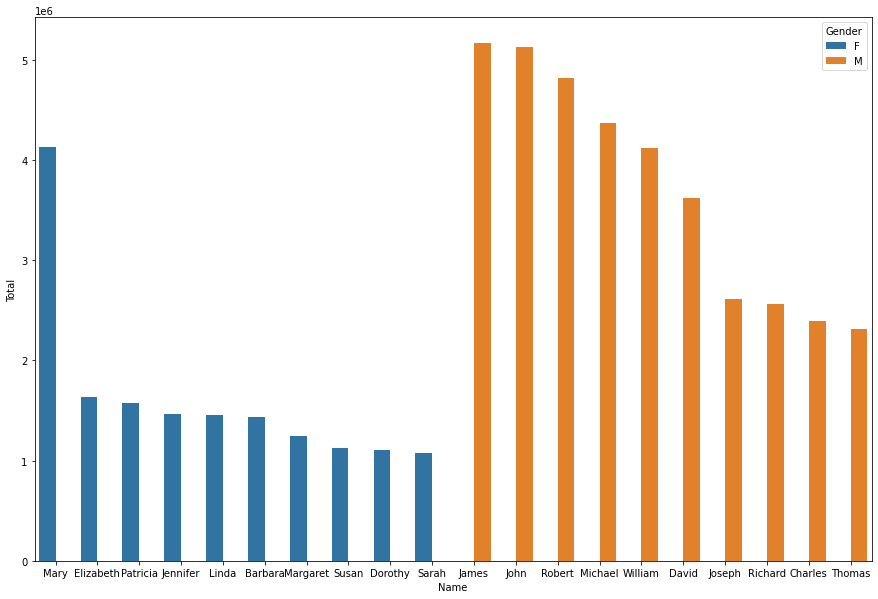

In [38]:
plt.figure(figsize = (15, 10))
sns.barplot(x = "Name", y = "Total", data = all_times, hue = "Gender")
plt.show()

## General Trends over Time (1880 - 2018)

In [39]:
pd.options.display.float_format = '{:.0f}'.format

In [40]:
babies_per_year = df.groupby("Year").Count.sum()

In [41]:
babies_per_year

Year
1880     201484
1881     192696
1882     221533
1883     216944
1884     243461
         ...   
2014    3698914
2015    3691990
2016    3657797
2017    3561975
2018    3487353
Name: Count, Length: 139, dtype: int64

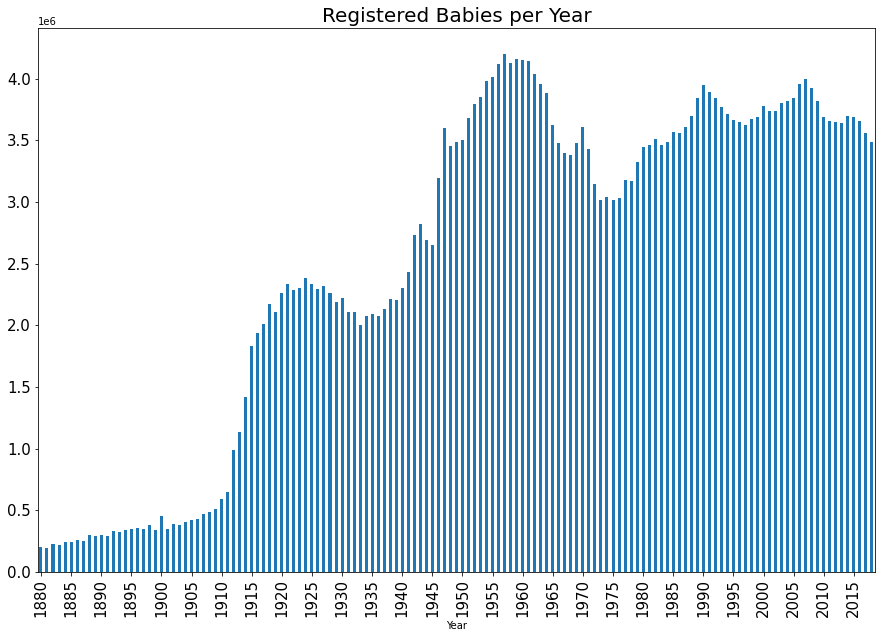

In [42]:
babies_per_year.plot(kind = "bar", y= "Count", figsize = (15, 10), fontsize = 15)
plt.xticks(ticks = (range(0, len(babies_per_year), 5)), labels =  range(1880, 2019, 5))
plt.title("Registered Babies per Year", fontsize = 20)
plt.show()

In [43]:
diff_names = df.groupby("Year").Name.count()
diff_names

Year
1880     2000
1881     1935
1882     2127
1883     2084
1884     2297
        ...  
2014    33243
2015    33121
2016    33010
2017    32590
2018    32033
Name: Name, Length: 139, dtype: int64

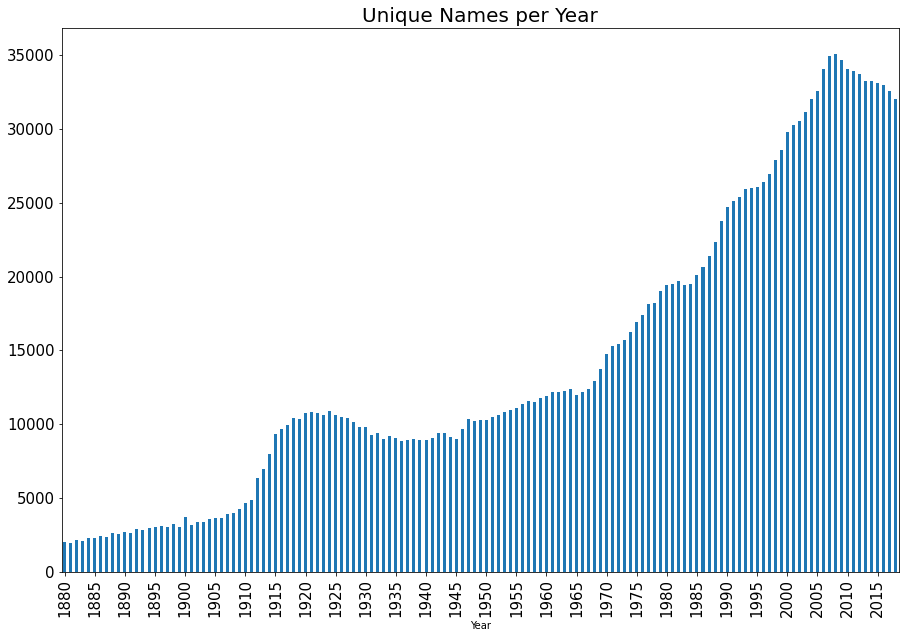

In [44]:
diff_names.plot(kind = "bar", figsize = (15, 10), fontsize = 15)
plt.xticks(ticks = (range(0, len(diff_names), 5)), labels =  range(1880, 2019, 5))
plt.title("Unique Names per Year", fontsize = 20)
plt.show()

## Creating the Features "Popularity" and "Rank"

In [45]:
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


__Popularity (babies per million)__

In [46]:
df.groupby(["Year", "Gender"]).Count.transform("sum")

0            90994
1            90994
2            90994
3            90994
4            90994
            ...   
1957041    1800392
1957042    1800392
1957043    1800392
1957044    1800392
1957045    1800392
Name: Count, Length: 1957046, dtype: int64

In [47]:
7065 / 90994 * 1000000

77642.48192188496

In [48]:
df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum"))*1000000

0         77642
1         28617
2         22012
3         21309
4         19188
           ... 
1957041       3
1957042       3
1957043       3
1957044       3
1957045       3
Name: Count, Length: 1957046, dtype: float64

In [49]:
df["Popularity"] = df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum"))*1000000

In [50]:
df

,Year,Name,Gender,Count,Popularity
0,1880,Mary,F,7065,77642
1,1880,Anna,F,2604,28617
2,1880,Emma,F,2003,22012
3,1880,Elizabeth,F,1939,21309
4,1880,Minnie,F,1746,19188
...,...,...,...,...,...
1957041,2018,Zylas,M,5,3
1957042,2018,Zyran,M,5,3
1957043,2018,Zyrie,M,5,3
1957044,2018,Zyron,M,5,3


__Rank__

In [51]:
df.groupby(["Year", "Gender"]).Count.apply(lambda x: x.rank(ascending = False))

0             1
1             2
2             3
3             4
4             5
           ... 
1957041   13042
1957042   13042
1957043   13042
1957044   13042
1957045   13042
Name: Count, Length: 1957046, dtype: float64

In [52]:
df["Rank"] =  df.groupby(["Year", "Gender"]).Count.apply(lambda x: x.rank(ascending = False))

In [53]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042
1957042,2018,Zyran,M,5,3,13042
1957043,2018,Zyrie,M,5,3,13042
1957044,2018,Zyron,M,5,3,13042


In [54]:
df[(df.Year == 2018) & (df.Gender == "M")].tail(60)

,Year,Name,Gender,Count,Popularity,Rank
1956986,2018,Zachry,M,5,3,13042
1956987,2018,Zaeed,M,5,3,13042
1956988,2018,Zahavi,M,5,3,13042
1956989,2018,Zaheir,M,5,3,13042
1956990,2018,Zahyan,M,5,3,13042
1956991,2018,Zaidenn,M,5,3,13042
1956992,2018,Zaier,M,5,3,13042
1956993,2018,Zailyn,M,5,3,13042
1956994,2018,Zaion,M,5,3,13042
1956995,2018,Zakery,M,5,3,13042


In [55]:
df[(df.Year == 2018) & (df.Gender == "M")].Popularity.sum()

999999.9999999999

## Visualizing Name Trends over Time

In [56]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042
1957042,2018,Zyran,M,5,3,13042
1957043,2018,Zyrie,M,5,3,13042
1957044,2018,Zyron,M,5,3,13042


In [57]:
mary = df[(df.Name == "Mary") & (df.Gender == "F")]
mary.tail(60)

,Year,Name,Gender,Count,Popularity,Rank
560704,1959,Mary,F,54474,26927,1
572471,1960,Mary,F,51475,25457,1
584392,1961,Mary,F,47680,23632,1
596575,1962,Mary,F,43486,22113,2
608784,1963,Mary,F,41550,21559,2
621066,1964,Mary,F,40990,21633,2
633463,1965,Mary,F,34270,19416,2
645416,1966,Mary,F,28884,17072,3
657568,1967,Mary,F,25313,15333,4
669967,1968,Mary,F,21725,13245,6


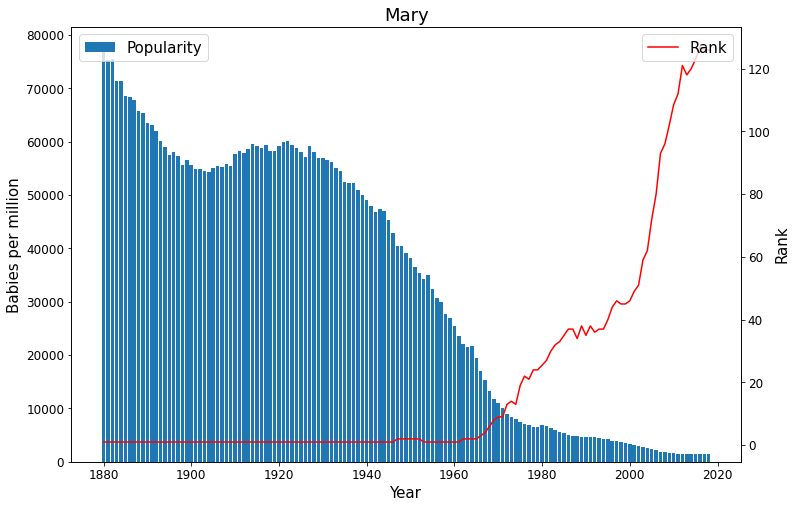

In [58]:
fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.bar(x = mary.Year, height= mary.Popularity, label = "Popularity")
ax2 = ax1.twinx()
ax2.plot(mary.Year, mary.Rank, color = "red", label = "Rank")
ax1.set_xlabel("Year", fontsize = 15)
ax1.set_ylabel("Babies per million", fontsize = 15)
ax2.set_ylabel("Rank", fontsize = 15)
ax1.set_title("Mary", fontsize = 18)
ax1.tick_params(labelsize = 12)
ax2.tick_params(labelsize = 12)
ax1.legend(loc = 2, fontsize = 15)
ax2.legend(loc = 1, fontsize = 15)
plt.show()

In [59]:
def plot_name(name, gender, crit = "Popularity"):
    data = df.loc[(df.Name == name) & (df.Gender == gender), ["Name", "Gender", "Year", "Rank", crit]]
    data = data.set_index("Year")
    
    fig, ax1 = plt.subplots(figsize = (12, 8))
    ax1.bar(x = data.index, height= data[crit], label = crit)
    ax2 = ax1.twinx()
    ax2.plot(data.index, data.Rank, color = "red", label = "Rank")
    ax1.set_xlabel("Year", fontsize = 15)
    ax1.set_ylabel(crit, fontsize = 15)
    ax2.set_ylabel("Rank", fontsize = 15)
    ax1.set_title(name, fontsize = 18)
    ax1.tick_params(labelsize = 12)
    ax2.tick_params(labelsize = 12)
    ax1.legend(loc = 2, fontsize = 15)
    ax2.legend(loc = 1, fontsize = 15)
    plt.show()

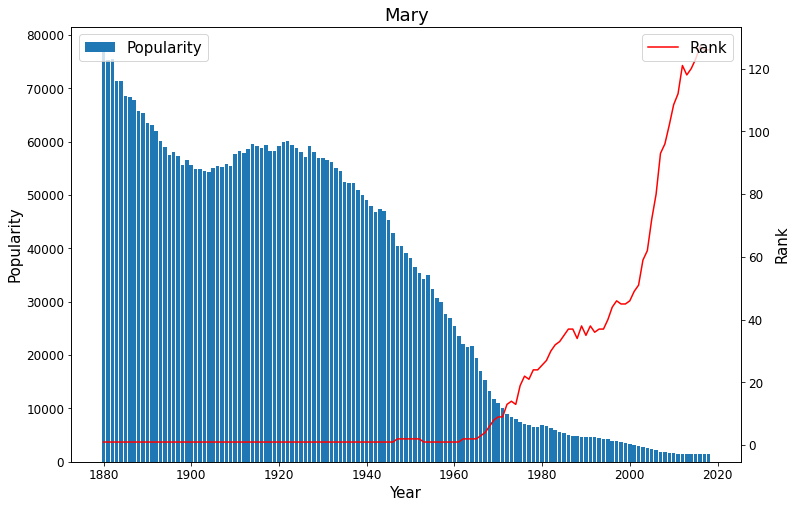

In [60]:
plot_name("Mary", "F")

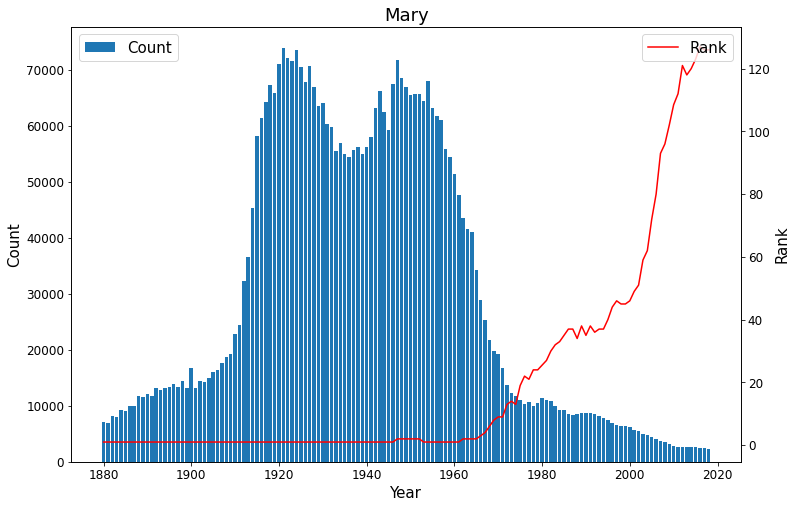

In [61]:
plot_name("Mary", "F", crit = "Count")

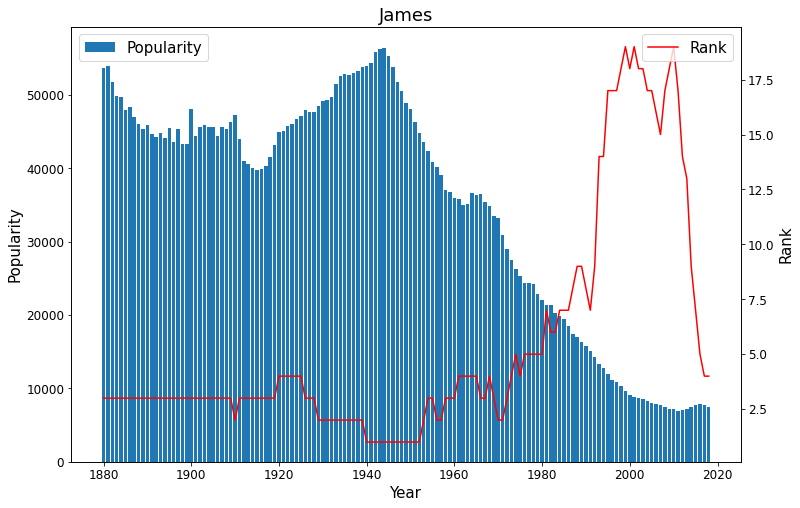

In [62]:
plot_name("James", "M", crit = "Popularity")

In [ ]:
m_evergreen

In [ ]:
for name in m_evergreen.Name:
    plot_name(name, "M", crit = "Popularity")

In [ ]:
for name in f_evergreen.Name:
    plot_name(name, "F", crit = "Popularity")

## Why does a Name´s Popularity suddenly change? (Part 1)

In [ ]:
df

In [ ]:
df.loc[(df.Name == "Mary") & (df.Gender == "F"), "Popularity"].shift()

In [ ]:
df["Pop_lag1"] = df.groupby(["Name", "Gender"]).Popularity.shift()

In [ ]:
df

In [ ]:
df[df.Name == "Ashanti"]

In [ ]:
df.loc[(df.Year > 1880) & (df.Pop_lag1.isna()), "Pop_lag1"] = 0

In [ ]:
df[df.Name == "Ashanti"]

In [ ]:
df["Pop_diff"] = df.Popularity - df.Pop_lag1

In [ ]:
df[(df.Name == "Mary") & (df.Gender == "F")]

In [ ]:
df[df.Name == "Ashanti"]

In [ ]:
df2 = df[df.Year >= 1900].copy()

In [ ]:
df2

In [ ]:
df2.nlargest(20, "Pop_diff")

In [ ]:
plot_name("Linda", "F")

In [ ]:
plot_name("Shirley", "F")

In [ ]:
plot_name("Jason", "M")

In [ ]:
df2.nsmallest(20, "Pop_diff")

## Why does a Name´s Popularity suddenly change? (Part 2)

__'From 0 to 100' Names__

In [ ]:
df2[(df2.Pop_lag1 < 5)].nlargest(20, "Pop_diff")

In [ ]:
df2[df2.Name == "Nakia"]

In [ ]:
plot_name("Nakia", "F")

In [ ]:
plot_name("Nakia", "M")

In [ ]:
plot_name("Kizzy", "F")

In [ ]:
plot_name("Rihanna", "F")

In [ ]:
plot_name("Whitney", "F")

In [ ]:
plot_name("Shaquille", "M")

__Highest percentage decrease among popular names__

In [ ]:
df2

In [ ]:
df2["%change"] = df2.Popularity.div(df2.Pop_lag1).sub(1).mul(100)

In [ ]:
df2

In [ ]:
df2[df2.Pop_lag1 > 1000].nsmallest(20, "%change")

In [ ]:
plot_name("Katina", "F")

In [ ]:
plot_name("Iesha", "F")

In [ ]:
plot_name("Ashanti", "F")

In [ ]:
plot_name("Woodrow", "M")

In [ ]:
plot_name("Hillary", "F")

### Persistant vs. Spike-Fade Names

In [ ]:
agg

In [ ]:
agg["Spike_Score"] = agg.Max_Count.div(agg.Total).mul(100)

In [ ]:
agg

In [ ]:
agg.sort_values(by = "Spike_Score", ascending = True).head(20)

In [ ]:
pers = agg.sort_values(by = "Spike_Score", ascending = True).head(20)

In [ ]:
pers

In [ ]:
l = list(zip(pers.Name, pers.Gender))
l

In [ ]:
for name in l:
    plot_name(name = name[0], gender = name[1], crit = "Count")

In [ ]:
spike = agg[(agg.Total > 1000) & (agg.No_Year > 10)].sort_values(by = "Spike_Score",
                                                                 ascending = False).head(20)
spike

In [ ]:
l2 = list(zip(spike.Name, spike.Gender))
l2

In [ ]:
for name in l2:
    plot_name(name = name[0], gender = name[1], crit = "Count")

## Most Popular Unisex Names

In [ ]:
df

In [ ]:
df[df.Name == "Mary"].groupby(["Name", "Gender"]).Count.sum()

In [ ]:
df.groupby(["Name", "Gender"]).Count.sum().unstack()

In [ ]:
unisex = df.groupby(["Name", "Gender"]).Count.sum().unstack()
unisex

In [ ]:
unisex.dropna(inplace = True)

In [ ]:
unisex

In [ ]:
unisex.min(axis = 1).sort_values(ascending = False)

In [ ]:
unisex_names = unisex.min(axis = 1).sort_values(ascending = False).index
unisex_names

In [ ]:
unisex.loc[unisex_names].head(20)

In [ ]:
unisex = unisex[unisex.min(axis = 1) > 10000]
unisex

In [ ]:
abs(unisex.F.div(unisex.M).sub(1)).sort_values()

In [ ]:
unisex_names2 = abs(unisex.F.div(unisex.M).sub(1)).sort_values().index
unisex_names2

In [ ]:
unisex.loc[unisex_names2].head(20)